In [1]:
! pip install pyforest

In [2]:
from pyforest import*
lazy_imports()

['import nltk',
 'from sklearn.ensemble import RandomForestClassifier',
 'from sklearn.manifold import TSNE',
 'from sklearn.linear_model import Lasso',
 'import imutils',
 'import matplotlib.pyplot as plt',
 'import tensorflow as tf',
 'import numpy as np',
 'import tqdm',
 'import torch',
 'import statsmodels.api as sm',
 'from sklearn.linear_model import ElasticNet',
 'import cv2',
 'from sklearn.ensemble import GradientBoostingClassifier',
 'from sklearn.model_selection import StratifiedKFold',
 'from sklearn.linear_model import LogisticRegression',
 'from xlrd import open_workbook',
 'from sklearn.impute import SimpleImputer',
 'from pyspark import SparkContext',
 'import pandas as pd',
 'from openpyxl import load_workbook',
 'from sklearn.model_selection import RandomizedSearchCV',
 'import datetime as dt',
 'import pydot',
 'import re',
 'from sklearn.model_selection import GridSearchCV',
 'from scipy import signal as sg',
 'import lightgbm as lgb',
 'from sklearn.preprocessing 

In [3]:
raw_data = pd.read_csv('psaData.csv')
raw_data.head()

<IPython.core.display.Javascript object>

,Age,Total PSA,Free PSA,Smoking status,Alcohol consumption,Education level,Occupation,Marital Status,Physical activity level,Dietary Pattern,Fruit Intake Frequency
0,62,7.3,1.5,Yes,No,Post-Graduate,Doctor,Married,Moderate,Low,High
1,42,2.4,0.4,Yes,Yes,University,Business,Married,Low,High,Moderate
2,40,2.5,0.5,Yes,Yes,University,Business,Married,Moderate,High,Low
3,55,7.9,1.2,Yes,No,Post-Graduate,Engineer,Married,High,High,Moderate
4,48,3.4,1.1,No,No,University,Business,Married,Low,Moderate,Low


In [4]:
raw_data.describe(include='all')

,Age,Total PSA,Free PSA,Smoking status,Alcohol consumption,Education level,Occupation,Marital Status,Physical activity level,Dietary Pattern,Fruit Intake Frequency
count,100.000000,100.000000,100.000000,100,100,100,100,100,100,100,100
unique,NaN,NaN,NaN,2,2,5,14,2,3,3,3
top,NaN,NaN,NaN,Yes,Yes,University,Business,Married,Low,High,Moderate
freq,NaN,NaN,NaN,60,75,50,32,96,55,60,37
mean,52.150000,6.347000,1.215000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,8.472624,4.741445,0.715397,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,39.000000,1.800000,0.200000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,45.000000,3.575000,0.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,50.000000,4.150000,1.100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,59.000000,7.350000,1.800000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Print the probability distribution functions for each feature. For optimal results, we should be looking for a normal distribution. 

C:\Users\qwe\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


<IPython.core.display.Javascript object>

C:\Users\qwe\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Axes: xlabel='Total PSA', ylabel='Density'>

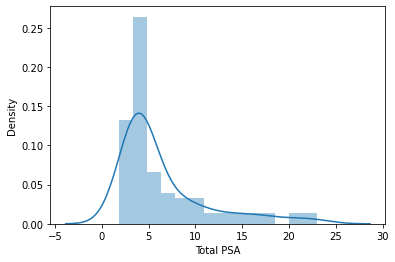

In [6]:
sns.distplot(raw_data['Total PSA'])

In [7]:
# Get the 99th percentile and keep the data below the 99th percentile
q = raw_data['Total PSA'].quantile(0.99)
data_1 = raw_data[raw_data['Total PSA']<q]
data_1.describe(include='all')

,Age,Total PSA,Free PSA,Smoking status,Alcohol consumption,Education level,Occupation,Marital Status,Physical activity level,Dietary Pattern,Fruit Intake Frequency
count,99.000000,99.000000,99.000000,99,99,99,99,99,99,99,99
unique,NaN,NaN,NaN,2,2,5,14,2,3,3,3
top,NaN,NaN,NaN,Yes,Yes,University,Business,Married,Low,High,High
freq,NaN,NaN,NaN,59,74,50,32,95,55,60,36
mean,52.090909,6.178788,1.201010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,8.495006,4.455592,0.705155,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,39.000000,1.800000,0.200000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,45.000000,3.550000,0.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,50.000000,4.100000,1.100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,59.000000,7.200000,1.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Try to find correlation between features
data_1.corr(numeric_only=True)


,Age,Total PSA,Free PSA
Age,1.000000,0.610755,0.515103
Total PSA,0.610755,1.000000,0.462488
Free PSA,0.515103,0.462488,1.000000


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

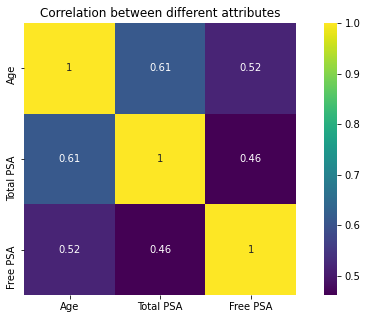

In [9]:
# Plot correlation heatmap

plt.figure(figsize=(10,5))
sns.heatmap(data_1.corr(numeric_only=True), vmax=1, square=True, annot=True, cmap='viridis')
plt.title('Correlation between different attributes')
plt.show()

<IPython.core.display.Javascript object>

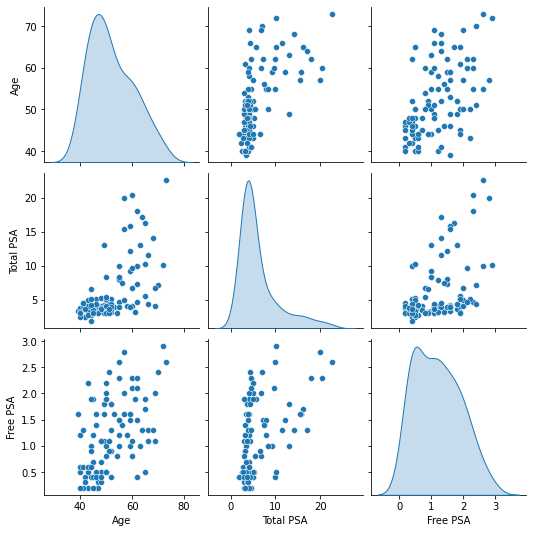

In [10]:
# Use pairplot to visualise correlation

sns.pairplot(data_1, diag_kind='kde')

In [11]:
def group_occupation(x):
    if x in ['Business', 'Fashion Designer', 'Artisan', 'Film Maker']:
        return 'Self_employed'
    elif x in ['Civil Servant', 'Engineer', 'Lawyer', 'Doctor', 'Lecturer', 'IT support', 'Pensioner']:
        return 'Professional'
    else:
        return 'Manual_transport_agric'

data_1['Occupation grouped'] = data_1['Occupation'].apply(group_occupation)
data_1


<ipython-input-11-9cfe068b19db>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1['Occupation grouped'] = data_1['Occupation'].apply(group_occupation)


,Age,Total PSA,Free PSA,Smoking status,Alcohol consumption,Education level,Occupation,Marital Status,Physical activity level,Dietary Pattern,Fruit Intake Frequency,Occupation grouped
0,62,7.3,1.5,Yes,No,Post-Graduate,Doctor,Married,Moderate,Low,High,Professional
1,42,2.4,0.4,Yes,Yes,University,Business,Married,Low,High,Moderate,Self_employed
2,40,2.5,0.5,Yes,Yes,University,Business,Married,Moderate,High,Low,Self_employed
3,55,7.9,1.2,Yes,No,Post-Graduate,Engineer,Married,High,High,Moderate,Professional
4,48,3.4,1.1,No,No,University,Business,Married,Low,Moderate,Low,Self_employed
...,...,...,...,...,...,...,...,...,...,...,...,...
95,44,5.1,1.9,No,Yes,University,IT support,Single,Moderate,High,Moderate,Professional
96,54,3.0,0.8,No,Yes,University,Business,Married,Moderate,High,Moderate,Self_employed
97,59,3.9,1.6,No,Yes,University,Business,Married,Low,Low,High,Self_employed
98,62,4.6,2.1,No,Yes,University,Pensioner,Married,Low,Low,High,Professional


In [12]:
data_1.columns = (
    data_1.columns
    .str.strip()
)

print(data_1.columns)


Index(['Age', 'Total PSA', 'Free PSA', 'Smoking status', 'Alcohol consumption',
       'Education level', 'Occupation', 'Marital Status',
       'Physical activity level', 'Dietary Pattern', 'Fruit Intake Frequency',
       'Occupation grouped'],
      dtype='object')


In [13]:
categorical_cols = [
    'Alcohol consumption',
    'Education level',
    'Physical activity level',
    'Dietary Pattern',
    'Fruit Intake Frequency',
    'Smoking status',
    'Occupation grouped'
]

dummied_data = pd.get_dummies(
    data_1,
    columns=categorical_cols,
    drop_first=True
)

dummied_data

<IPython.core.display.Javascript object>

,Age,Total PSA,Free PSA,Occupation,Marital Status,Alcohol consumption_Yes,Education level_Post-Graduate,Education level_Primary,Education level_Secondary,Education level_University,Physical activity level_Low,Physical activity level_Moderate,Dietary Pattern_Low,Dietary Pattern_Moderate,Fruit Intake Frequency_Low,Fruit Intake Frequency_Moderate,Smoking status_Yes,Occupation grouped_Professional,Occupation grouped_Self_employed
0,62,7.3,1.5,Doctor,Married,False,True,False,False,False,False,True,True,False,False,False,True,True,False
1,42,2.4,0.4,Business,Married,True,False,False,False,True,True,False,False,False,False,True,True,False,True
2,40,2.5,0.5,Business,Married,True,False,False,False,True,False,True,False,False,True,False,True,False,True
3,55,7.9,1.2,Engineer,Married,False,True,False,False,False,False,False,False,False,False,True,True,True,False
4,48,3.4,1.1,Business,Married,False,False,False,False,True,True,False,False,True,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,44,5.1,1.9,IT support,Single,True,False,False,False,True,False,True,False,False,False,True,False,True,False
96,54,3.0,0.8,Business,Married,True,False,False,False,True,False,True,False,False,False,True,False,False,True
97,59,3.9,1.6,Business,Married,True,False,False,False,True,True,False,True,False,False,False,False,False,True
98,62,4.6,2.1,Pensioner,Married,True,False,False,False,True,True,False,True,False,False,False,False,True,False


In [14]:
# Declare inputs and Targets

In [15]:
# Create Binary Outcome
dummied_data['psa_elevated'] = (dummied_data['Total PSA'] >= 4).astype(int)

dummied_data

,Age,Total PSA,Free PSA,Occupation,Marital Status,Alcohol consumption_Yes,Education level_Post-Graduate,Education level_Primary,Education level_Secondary,Education level_University,Physical activity level_Low,Physical activity level_Moderate,Dietary Pattern_Low,Dietary Pattern_Moderate,Fruit Intake Frequency_Low,Fruit Intake Frequency_Moderate,Smoking status_Yes,Occupation grouped_Professional,Occupation grouped_Self_employed,psa_elevated
0,62,7.3,1.5,Doctor,Married,False,True,False,False,False,False,True,True,False,False,False,True,True,False,1
1,42,2.4,0.4,Business,Married,True,False,False,False,True,True,False,False,False,False,True,True,False,True,0
2,40,2.5,0.5,Business,Married,True,False,False,False,True,False,True,False,False,True,False,True,False,True,0
3,55,7.9,1.2,Engineer,Married,False,True,False,False,False,False,False,False,False,False,True,True,True,False,1
4,48,3.4,1.1,Business,Married,False,False,False,False,True,True,False,False,True,True,False,False,False,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,44,5.1,1.9,IT support,Single,True,False,False,False,True,False,True,False,False,False,True,False,True,False,1
96,54,3.0,0.8,Business,Married,True,False,False,False,True,False,True,False,False,False,True,False,False,True,0
97,59,3.9,1.6,Business,Married,True,False,False,False,True,True,False,True,False,False,False,False,False,True,0
98,62,4.6,2.1,Pensioner,Married,True,False,False,False,True,True,False,True,False,False,False,False,True,False,1


In [16]:
dummied_data['Smoking status_Yes'].value_counts()

Smoking status_Yes
True     59
False    40
Name: count, dtype: int64

In [17]:
dummied_data['psa_elevated'].value_counts()

psa_elevated
1    61
0    38
Name: count, dtype: int64

In [19]:
# Define Target and Inputs 

# Drop what we don't need:
# 1. Target variable itself (psa_elevated)
# 2. ALL PSA measurements (Total PSA, Free PSA) - to avoid data leakage
# 3. Original Occupation (we have Occupation grouped)
# 4. Marital Status (appears to have no variance - mostly "Married")

In [21]:
target = dummied_data['psa_elevated']

# Create inputs wuthout any PSA measurements to avoid data leakage
inputs = dummied_data.drop(columns=[
    'Total PSA',           # Target determinant
    'Free PSA',            # Component of Total PSA - data leakage!
    'psa_elevated',        # Target variable
    'Occupation',          # Original occupation (using grouped version)
    'Marital Status'       # Low variance
])

print("Features in the model:")
print(inputs.columns.tolist())
print(f"\nTotal features: {len(inputs.columns)}")
print(f"Samples: {len(inputs)}")


Features in the model:
['Age', 'Alcohol consumption_Yes', 'Education level_Post-Graduate', 'Education level_Primary', 'Education level_Secondary', 'Education level_University', 'Physical activity level_Low', 'Physical activity level_Moderate', 'Dietary Pattern_Low', 'Dietary Pattern_Moderate', 'Fruit Intake Frequency_Low', 'Fruit Intake Frequency_Moderate', 'Smoking status_Yes', 'Occupation grouped_Professional', 'Occupation grouped_Self_employed']

Total features: 15
Samples: 99


### Check Sample Size vs Predictor Count (EPV Rule)

Events Per Variable (EPV) rule:
- **Conservative:** 10-15 events per predictor
- **Modern guidance:** 5-10 events per predictor
- **With regularization:** flexible



In [30]:
# Check the Events Per Variable (EPV) ratio


print("SAMPLE SIZE vs PREDICTOR COUNT ANALYSIS")


# Count events (elevated PSA cases)
n_elevated = target.sum()
n_normal = len(target) - n_elevated
total_samples = len(target)

print(f"\n CLASS DISTRIBUTION:")
print(f"   Total samples: {total_samples}")
print(f"   Elevated PSA (≥4.0): {n_elevated} ({n_elevated/total_samples*100:.1f}%)")
print(f"   Normal PSA (<4.0): {n_normal} ({n_normal/total_samples*100:.1f}%)")

# Count predictors in current model
n_predictors = len(inputs.columns)

print(f"\n PREDICTOR COUNT:")
print(f"   Number of features: {n_predictors}")
print(f"   Features: {list(inputs.columns)}")

# Calculate EPV
epv = n_elevated / n_predictors

print(f"\n EVENTS PER VARIABLE (EPV) RATIO:")
print(f"   EPV = {epv:.2f} events per predictor")

print(f"\n RESULT: EPV = {epv:.2f} ")




SAMPLE SIZE vs PREDICTOR COUNT ANALYSIS

 CLASS DISTRIBUTION:
   Total samples: 99
   Elevated PSA (≥4.0): 61 (61.6%)
   Normal PSA (<4.0): 38 (38.4%)

 PREDICTOR COUNT:
   Number of features: 15
   Features: ['Age', 'Alcohol consumption_Yes', 'Education level_Post-Graduate', 'Education level_Primary', 'Education level_Secondary', 'Education level_University', 'Physical activity level_Low', 'Physical activity level_Moderate', 'Dietary Pattern_Low', 'Dietary Pattern_Moderate', 'Fruit Intake Frequency_Low', 'Fruit Intake Frequency_Moderate', 'Smoking status_Yes', 'Occupation grouped_Professional', 'Occupation grouped_Self_employed']

 EVENTS PER VARIABLE (EPV) RATIO:
   EPV = 4.07 events per predictor

 RESULT: EPV = 4.07 


In [27]:
# As the EPV is low, we can:
# Reduce predictors OR Apply strong regularization OR use feature selection methods


#### Solution: Two Approaches will be implemented to Handle Low EPV. Both performance will be compared.

##### **Option A: Conservative (6 predictors)**
- Strictly follows EPV ≥ 10 rule and No regularization needed

##### **Option B: Moderate (10-12 predictors + L1 Regularization)**
- Uses modern regularization techniques, Keep all features


In [34]:
# OPTION A: Conservative, 6 most important risk factors.

inputs_optionA = dummied_data[[
    'Age',                         
    'Smoking status_Yes',          
    'Alcohol consumption_Yes',      
    'Physical activity level_Low', 
    'Dietary Pattern_Low',         
    'Education level_University'    
]]

target_optionA = target  


print("OPTION A: CONSERVATIVE APPROACH (CORRECTED)")

print(f"\nFeatures selected: {len(inputs_optionA.columns)}")
print(f"Features:\n  " + "\n  ".join(inputs_optionA.columns))
print(f"\nNew EPV = {n_elevated}/{len(inputs_optionA.columns)} = {n_elevated/len(inputs_optionA.columns):.2f}")


OPTION A: CONSERVATIVE APPROACH (CORRECTED)

Features selected: 6
Features:
  Age
  Smoking status_Yes
  Alcohol consumption_Yes
  Physical activity level_Low
  Dietary Pattern_Low
  Education level_University

New EPV = 61/6 = 10.17


In [36]:
# OPTION B: More features. 11 risk factors with L1 regularization

inputs_optionB = dummied_data[[
    'Age',                          
    'Smoking status_Yes',           
    'Alcohol consumption_Yes',      
    'Physical activity level_Low',  
    'Physical activity level_Moderate',  
    'Dietary Pattern_Low',        
    'Dietary Pattern_Moderate',     
    'Fruit Intake Frequency_Low',  
    'Fruit Intake Frequency_Moderate',  
    'Education level_University',   
    'Occupation grouped_Professional' 
]]

target_optionB = target  

print(f"\nFeatures selected: {len(inputs_optionB.columns)}")
print(f"Features:\n  " + "\n  ".join(inputs_optionB.columns))
print(f"\nNew EPV = {n_elevated}/{len(inputs_optionB.columns)} = {n_elevated/len(inputs_optionB.columns):.2f}")



Features selected: 11
Features:
  Age
  Smoking status_Yes
  Alcohol consumption_Yes
  Physical activity level_Low
  Physical activity level_Moderate
  Dietary Pattern_Low
  Dietary Pattern_Moderate
  Fruit Intake Frequency_Low
  Fruit Intake Frequency_Moderate
  Education level_University
  Occupation grouped_Professional

New EPV = 61/11 = 5.55


#### Train-Test Split

Split both Option A and Option B datasets into training and testing sets.

In [38]:
from sklearn.model_selection import train_test_split

# Split Option A
X_train_A, X_test_A, y_train_A, y_test_A = train_test_split(
    inputs_optionA, target_optionA, test_size=0.3, random_state=42, stratify=target_optionA
)

# Split Option B
X_train_B, X_test_B, y_train_B, y_test_B = train_test_split(
    inputs_optionB, target_optionB, test_size=0.3, random_state=42, stratify=target_optionB
)


print("TRAIN-TEST SPLIT COMPLETE")

print(f"\nOption A:")
print(f"  Training set: {len(X_train_A)} samples")
print(f"  Testing set:  {len(X_test_A)} samples")
print(f"  Training elevated PSA: {y_train_A.sum()} ({y_train_A.sum()/len(y_train_A)*100:.1f}%)")
print(f"  Testing elevated PSA:  {y_test_A.sum()} ({y_test_A.sum()/len(y_test_A)*100:.1f}%)")

print(f"\nOption B:")
print(f"  Training set: {len(X_train_B)} samples")
print(f"  Testing set:  {len(X_test_B)} samples")
print(f"  Training elevated PSA: {y_train_B.sum()} ({y_train_B.sum()/len(y_train_B)*100:.1f}%)")
print(f"  Testing elevated PSA:  {y_test_B.sum()} ({y_test_B.sum()/len(y_test_B)*100:.1f}%)")


TRAIN-TEST SPLIT COMPLETE

Option A:
  Training set: 69 samples
  Testing set:  30 samples
  Training elevated PSA: 43 (62.3%)
  Testing elevated PSA:  18 (60.0%)

Option B:
  Training set: 69 samples
  Testing set:  30 samples
  Training elevated PSA: 43 (62.3%)
  Testing elevated PSA:  18 (60.0%)


#### Train Logistic Regression Models

Train logistic regression for both options:
- **Option A**: Standard logistic regression (EPV ≥ 10)
- **Option B**: L1 regularization (Lasso)

In [42]:
from sklearn.linear_model import LogisticRegression

# Option A: Standard Logistic Regression
print("\n Training Option A (Standard Logistic Regression)")
model_lr_A = LogisticRegression(max_iter=1000, random_state=42)
model_lr_A.fit(X_train_A, y_train_A)
print("    Option A trained")

# Option B: L1 Regularization (Lasso)
print("\n Training Option B (L1 Regularization)")
model_lr_B = LogisticRegression(penalty='l1', solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model_lr_B.fit(X_train_B, y_train_B)
print("    Option B trained")



 Training Option A (Standard Logistic Regression)
    Option A trained

 Training Option B (L1 Regularization)
    Option B trained


####  Evaluate Models

Calculate accuracy, precision, recall, F1-score, ROC-AUC, and specificity for both models.

OPTION A: Standard Logistic Regression

 Classification Metrics:
   Accuracy:   0.6000
   Precision:  0.6500 (Positive Predictive Value)
   Recall:     0.7222 (Sensitivity) 
   F1-Score:   0.6842
   ROC-AUC:    0.6898
   Specificity: 0.4167

 Confusion Matrix:
   True Negatives:    5 (Correctly predicted normal)
   False Positives:   7 (Incorrectly predicted elevated)
   False Negatives:   5 (Missed elevated cases)
   True Positives:   13 (Correctly predicted elevated)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

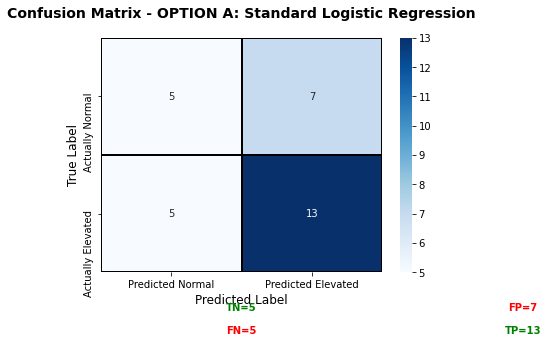

OPTION B: L1 Regularized Logistic Regression

 Classification Metrics:
   Accuracy:   0.5333
   Precision:  0.5833 (Positive Predictive Value)
   Recall:     0.7778 (Sensitivity) 
   F1-Score:   0.6667
   ROC-AUC:    0.6481
   Specificity: 0.1667

 Confusion Matrix:
   True Negatives:    2 (Correctly predicted normal)
   False Positives:  10 (Incorrectly predicted elevated)
   False Negatives:   4 (Missed elevated cases)
   True Positives:   14 (Correctly predicted elevated)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

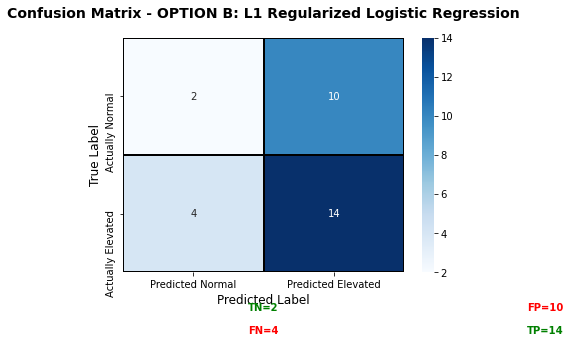

In [49]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import numpy as np
import seaborn as sns

def evaluate_model(model, X_test, y_test, model_name):
    """Comprehensive model evaluation with confusion matrix heatmap"""
    # Predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    
    # Print results
    print(f"{model_name}")
    print(f"\n Classification Metrics:")
    print(f"   Accuracy:   {accuracy:.4f}")
    print(f"   Precision:  {precision:.4f} (Positive Predictive Value)")
    print(f"   Recall:     {recall:.4f} (Sensitivity) ")
    print(f"   F1-Score:   {f1:.4f}")
    print(f"   ROC-AUC:    {roc_auc:.4f}")
    print(f"   Specificity: {specificity:.4f}")
    
    print(f"\n Confusion Matrix:")
    print(f"   True Negatives:  {tn:3d} (Correctly predicted normal)")
    print(f"   False Positives: {fp:3d} (Incorrectly predicted elevated)")
    print(f"   False Negatives: {fn:3d} (Missed elevated cases)")
    print(f"   True Positives:  {tp:3d} (Correctly predicted elevated)")
    
    # Visualize confusion matrix as heatmap
    plt.figure(figsize=(7, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True,
                xticklabels=['Predicted Normal', 'Predicted Elevated'],
                yticklabels=['Actually Normal', 'Actually Elevated'],
                linewidths=2, linecolor='black')
    plt.title(f'Confusion Matrix - {model_name}', fontsize=14, fontweight='bold', pad=20)
    plt.ylabel('True Label', fontsize=12)
    plt.xlabel('Predicted Label', fontsize=12)
    
    # Add annotations for better interpretation
    plt.text(0.5, -0.15, f'TN={tn}', ha='center', va='center', transform=plt.gca().transAxes, fontsize=10, color='green', fontweight='bold')
    plt.text(1.5, -0.15, f'FP={fp}', ha='center', va='center', transform=plt.gca().transAxes, fontsize=10, color='red', fontweight='bold')
    plt.text(0.5, -0.25, f'FN={fn}', ha='center', va='center', transform=plt.gca().transAxes, fontsize=10, color='red', fontweight='bold')
    plt.text(1.5, -0.25, f'TP={tp}', ha='center', va='center', transform=plt.gca().transAxes, fontsize=10, color='green', fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'roc_auc': roc_auc,
        'specificity': specificity
    }

# Evaluate both models
metrics_lr_A = evaluate_model(model_lr_A, X_test_A, y_test_A, "OPTION A: Standard Logistic Regression")
metrics_lr_B = evaluate_model(model_lr_B, X_test_B, y_test_B, "OPTION B: L1 Regularized Logistic Regression")



#### Step 4: Compare Logistic Regression Models

Comparison of Option A vs Option B

In [52]:
# Create  DataFrame
comparison_lr = pd.DataFrame({
    'Option A (6 features)': pd.Series(metrics_lr_A),
    'Option B (11 features + L1)': pd.Series(metrics_lr_B)
})

# Add difference column
comparison_lr['Difference (B - A)'] = comparison_lr['Option B (11 features + L1)'] - comparison_lr['Option A (6 features)']


print(" LOGISTIC REGRESSION: OPTION A vs OPTION B COMPARISON")

print(comparison_lr.round(4))



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 LOGISTIC REGRESSION: OPTION A vs OPTION B COMPARISON
             Option A (6 features)  Option B (11 features + L1)  \
accuracy                    0.6000                       0.5333   
precision                   0.6500                       0.5833   
recall                      0.7222                       0.7778   
f1                          0.6842                       0.6667   
roc_auc                     0.6898                       0.6481   
specificity                 0.4167                       0.1667   

             Difference (B - A)  
accuracy                -0.0667  
precision               -0.0667  
recall                   0.0556  
f1                      -0.0175  
roc_auc                 -0.0417  
specificity             -0.2500  


#### From above:
- Positive difference = Option B performs better")
- Negative difference = Option A performs better")
- Recall (Sensitivity) is MOST important for healthcare screening")


#### Feature Coefficients Analysis

Examine which features are most important in each model. where:
- Positive coefficient = Increases risk of elevated PSA
- Negative coefficient = Decreases risk of elevated PSA
- Larger |coefficient| = Stronger effect

In [54]:

print(" FEATURE COEFFICIENTS ANALYSIS")

# Option A coefficients
print("\n OPTION A - Feature Importance (Standard Logistic Regression):")
coef_lr_A = pd.DataFrame({
    'Feature': X_train_A.columns,
    'Coefficient': model_lr_A.coef_[0]
}).sort_values('Coefficient', key=abs, ascending=False)
print(coef_lr_A.to_string(index=False))

# Option B coefficients
print("\n\n OPTION B - Feature Importance (L1 Regularized):")
coef_lr_B = pd.DataFrame({
    'Feature': X_train_B.columns,
    'Coefficient': model_lr_B.coef_[0]
}).sort_values('Coefficient', key=abs, ascending=False)
print(coef_lr_B.to_string(index=False))

# Check for features zeroed out by L1
zeroed_features = coef_lr_B[coef_lr_B['Coefficient'] == 0]
if len(zeroed_features) > 0:
    print(f"\n  L1 Regularization zeroed out {len(zeroed_features)} feature(s):")
    print(zeroed_features['Feature'].tolist())
else:
    print("\n All features retained by L1 regularization")

print("\n Interpretation:")



 FEATURE COEFFICIENTS ANALYSIS

 OPTION A - Feature Importance (Standard Logistic Regression):


<IPython.core.display.Javascript object>

                    Feature  Coefficient
         Smoking status_Yes     0.840239
    Alcohol consumption_Yes     0.815613
Physical activity level_Low    -0.391048
 Education level_University     0.196548
                        Age     0.194733
        Dietary Pattern_Low    -0.007575


 OPTION B - Feature Importance (L1 Regularized):


<IPython.core.display.Javascript object>

                         Feature  Coefficient
Physical activity level_Moderate     0.555329
        Dietary Pattern_Moderate     0.509239
              Smoking status_Yes     0.324302
 Occupation grouped_Professional     0.226533
 Fruit Intake Frequency_Moderate    -0.210460
     Physical activity level_Low    -0.169570
                             Age     0.089770
         Alcohol consumption_Yes     0.000000
             Dietary Pattern_Low     0.000000
      Fruit Intake Frequency_Low     0.000000
      Education level_University     0.000000

  L1 Regularization zeroed out 4 feature(s):
['Alcohol consumption_Yes', 'Dietary Pattern_Low', 'Fruit Intake Frequency_Low', 'Education level_University']

 Interpretation:


#### Step 6: Train SVM & Random Forest models

Train SVM and Random Forest on Option B (better feature set).

In [57]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

print("TRAIN SVM & RANDOM FOREST models")


# SVM requires feature scaling
print("\n Training Support Vector Machine")
scaler = StandardScaler()
X_train_B_scaled = scaler.fit_transform(X_train_B)
X_test_B_scaled = scaler.transform(X_test_B)

model_svm = SVC(kernel='rbf', C=1.0, gamma='scale', probability=True, random_state=42)
model_svm.fit(X_train_B_scaled, y_train_B)
print("SVM trained successfully")

# Random Forest
print("\n Training Random Forest")
model_rf = RandomForestClassifier(
    n_estimators=100, 
    max_depth=10, 
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1
)
model_rf.fit(X_train_B, y_train_B)
print("  Random Forest trained successfully")


TRAIN SVM & RANDOM FOREST models

 Training Support Vector Machine
SVM trained successfully

 Training Random Forest
  Random Forest trained successfully


#### Evaluate All Models

Compare Logistic Regression, SVM, and Random Forest.

Support Vector Machine (RBF)

 Classification Metrics:
   Accuracy:   0.5667
   Precision:  0.6667
   Recall:     0.5556 
   F1-Score:   0.6061
   ROC-AUC:    0.6991
   Specificity: 0.5833

 Confusion Matrix:
   TN:   7  FP:   5  FN:   8  TP:  10


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

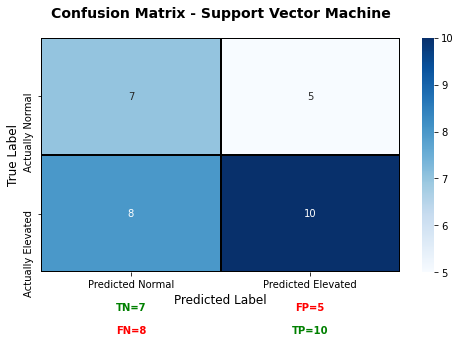

Random Forest

 Classification Metrics:
   Accuracy:   0.6333
   Precision:  0.7059 (Positive Predictive Value)
   Recall:     0.6667 (Sensitivity) 
   F1-Score:   0.6857
   ROC-AUC:    0.7130
   Specificity: 0.5833

 Confusion Matrix:
   True Negatives:    7 (Correctly predicted normal)
   False Positives:   5 (Incorrectly predicted elevated)
   False Negatives:   6 (Missed elevated cases)
   True Positives:   12 (Correctly predicted elevated)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

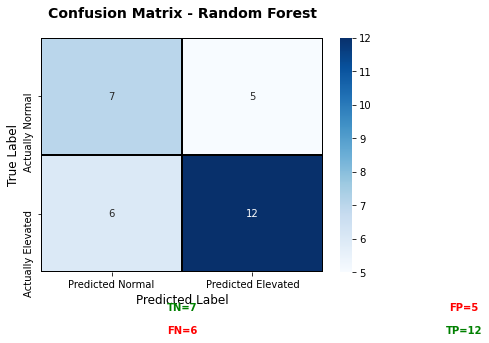

In [67]:
# Evaluate SVM (using scaled data)
def evaluate_model_scaled(model, X_test_scaled, y_test, model_name):
    y_pred = model.predict(X_test_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    
    print(f"{model_name}")
    print(f"{'=' * 70}")
    print(f"\n Classification Metrics:")
    print(f"   Accuracy:   {accuracy:.4f}")
    print(f"   Precision:  {precision:.4f}")
    print(f"   Recall:     {recall:.4f} ")
    print(f"   F1-Score:   {f1:.4f}")
    print(f"   ROC-AUC:    {roc_auc:.4f}")
    print(f"   Specificity: {specificity:.4f}")
    
    print(f"\n Confusion Matrix:")
    print(f"   TN: {tn:3d}  FP: {fp:3d}  FN: {fn:3d}  TP: {tp:3d}")
    
    
    # Add heatmap plotting here 
#     plt.figure(figsize=(6,4)) 
#     sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False) 
#     plt.title(f"Confusion Matrix - {model_name}") 
#     plt.xlabel("Predicted") 
#     plt.ylabel("Actual") 
#     plt.show()

    plt.figure(figsize=(7, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True,
                xticklabels=['Predicted Normal', 'Predicted Elevated'],
                yticklabels=['Actually Normal', 'Actually Elevated'],
                linewidths=2, linecolor='black')
    plt.title('Confusion Matrix - Support Vector Machine', fontsize=14, fontweight='bold', pad=20)
    plt.ylabel('True Label', fontsize=12)
    plt.xlabel('Predicted Label', fontsize=12)

    # Add annotations for better interpretation
    plt.text(0.5, 2.3, f'TN={tn}', ha='center', va='center', fontsize=10, color='green', fontweight='bold')
    plt.text(1.5, 2.3, f'FP={fp}', ha='center', va='center', fontsize=10, color='red', fontweight='bold')
    plt.text(0.5, 2.5, f'FN={fn}', ha='center', va='center', fontsize=10, color='red', fontweight='bold')
    plt.text(1.5, 2.5, f'TP={tp}', ha='center', va='center', fontsize=10, color='green', fontweight='bold')

    plt.tight_layout()
    plt.show()
    
    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'roc_auc': roc_auc,
        'specificity': specificity
    }

metrics_svm = evaluate_model_scaled(model_svm, X_test_B_scaled, y_test_B, "Support Vector Machine (RBF)")
metrics_rf = evaluate_model(model_rf, X_test_B, y_test_B, "Random Forest")



In [68]:
# Compare all three models
comparison_all = pd.DataFrame({
    'Logistic Regression (L1)': pd.Series(metrics_lr_B),
    'SVM': pd.Series(metrics_svm),
    'Random Forest': pd.Series(metrics_rf)
})


print(" COMPREHENSIVE MODEL COMPARISON (All on Option B features)")

print(comparison_all.round(4))

# Find best model for each metric
print("\n Best Model per Metric:")
for metric in comparison_all.index:
    best_model = comparison_all.loc[metric].idxmax()
    best_value = comparison_all.loc[metric].max()
    print(f"   {metric:12s}: {best_model:30s} ({best_value:.4f})")



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 COMPREHENSIVE MODEL COMPARISON (All on Option B features)
             Logistic Regression (L1)     SVM  Random Forest
accuracy                       0.5333  0.5667         0.6333
precision                      0.5833  0.6667         0.7059
recall                         0.7778  0.5556         0.6667
f1                             0.6667  0.6061         0.6857
roc_auc                        0.6481  0.6991         0.7130
specificity                    0.1667  0.5833         0.5833

 Best Model per Metric:
   accuracy    : Random Forest                  (0.6333)
   precision   : Random Forest                  (0.7059)
   recall      : Logistic Regression (L1)       (0.7778)
   f1          : Random Forest                  (0.6857)
   roc_auc     : Random Forest                  (0.7130)
   specificity : SVM                            (0.5833)


#### Cross-Validation

Verify model stability using 5-fold stratified cross-validation.

In [70]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

print("CROSS-VALIDATION (5-Fold Stratified)")

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define models for CV (use full Option B dataset)
# Note: SVM needs scaling, so use Pipeline
models_cv = {
    'Logistic Regression (L1)': LogisticRegression(penalty='l1', solver='liblinear', C=1.0, max_iter=1000, random_state=42),
    'SVM (RBF)': Pipeline([
        ('scaler', StandardScaler()),
        ('svm', SVC(kernel='rbf', C=1.0, gamma='scale', probability=True, random_state=42))
    ]),
    'Random Forest': RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=5, random_state=42, n_jobs=-1)
}

cv_results = {}

for model_name, model in models_cv.items():
    print(f"\n {model_name}")
    
    # Cross-validation for multiple metrics
    accuracy_scores = cross_val_score(model, inputs_optionB, target_optionB, cv=cv, scoring='accuracy')
    recall_scores = cross_val_score(model, inputs_optionB, target_optionB, cv=cv, scoring='recall')
    precision_scores = cross_val_score(model, inputs_optionB, target_optionB, cv=cv, scoring='precision')
    f1_scores = cross_val_score(model, inputs_optionB, target_optionB, cv=cv, scoring='f1')
    roc_auc_scores = cross_val_score(model, inputs_optionB, target_optionB, cv=cv, scoring='roc_auc')
    
    cv_results[model_name] = {
        'Accuracy': (accuracy_scores.mean(), accuracy_scores.std()),
        'Recall': (recall_scores.mean(), recall_scores.std()),
        'Precision': (precision_scores.mean(), precision_scores.std()),
        'F1-Score': (f1_scores.mean(), f1_scores.std()),
        'ROC-AUC': (roc_auc_scores.mean(), roc_auc_scores.std())
    }
    
    print(f"   Accuracy:  {accuracy_scores.mean():.4f} (±{accuracy_scores.std():.4f})")
    print(f"   Recall:    {recall_scores.mean():.4f} (±{recall_scores.std():.4f}) ")
    print(f"   Precision: {precision_scores.mean():.4f} (±{precision_scores.std():.4f})")
    print(f"   F1-Score:  {f1_scores.mean():.4f} (±{f1_scores.std():.4f})")
    print(f"   ROC-AUC:   {roc_auc_scores.mean():.4f} (±{roc_auc_scores.std():.4f})")



CROSS-VALIDATION (5-Fold Stratified)

 Logistic Regression (L1)
   Accuracy:  0.6879 (±0.0704)
   Recall:    0.8692 (±0.0390) 
   Precision: 0.6999 (±0.0519)
   F1-Score:  0.7752 (±0.0463)
   ROC-AUC:   0.8092 (±0.0609)

 SVM (RBF)
   Accuracy:  0.7274 (±0.0923)
   Recall:    0.8538 (±0.0772) 
   Precision: 0.7523 (±0.0893)
   F1-Score:  0.7962 (±0.0655)
   ROC-AUC:   0.8514 (±0.1195)

 Random Forest
   Accuracy:  0.7584 (±0.0955)
   Recall:    0.8705 (±0.0799) 
   Precision: 0.7721 (±0.0700)
   F1-Score:  0.8171 (±0.0667)
   ROC-AUC:   0.8245 (±0.0616)


In [74]:
from sklearn.model_selection import cross_val_score, StratifiedKFold


print(" CROSS-VALIDATION BOXPLOTS")


cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define models
models_cv = {
    'LR (L1)': LogisticRegression(penalty='l1', solver='liblinear', C=1.0, max_iter=1000, random_state=42),
    'SVM (RBF)': Pipeline([
        ('scaler', StandardScaler()),
        ('svm', SVC(kernel='rbf', C=1.0, gamma='scale', probability=True, random_state=42))
    ]),
    'Random Forest': RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=5, random_state=42, n_jobs=-1)
}

# Collect scores for each model
recall_data = []
f1_data = []
model_names = []

for model_name, model in models_cv.items():
    print(f"\n CV scores for {model_name}")
    
    # Get raw scores from each fold
    recall_scores = cross_val_score(model, inputs_optionB, target_optionB, cv=cv, scoring='recall')
    f1_scores = cross_val_score(model, inputs_optionB, target_optionB, cv=cv, scoring='f1')
    
    recall_data.append(recall_scores)
    f1_data.append(f1_scores)
    model_names.append(model_name)
    
    print(f"   Recall: {recall_scores}")
    print(f"   F1:     {f1_scores}")



 CROSS-VALIDATION BOXPLOTS

 CV scores for LR (L1)
   Recall: [0.84615385 0.91666667 0.83333333 0.83333333 0.91666667]
   F1:     [0.73333333 0.81481481 0.74074074 0.74074074 0.84615385]

 CV scores for SVM (RBF)
   Recall: [0.76923077 0.91666667 0.75       0.91666667 0.91666667]
   F1:     [0.74074074 0.75862069 0.75       0.91666667 0.81481481]

 CV scores for Random Forest
   Recall: [0.76923077 0.91666667 0.83333333 0.83333333 1.        ]
   F1:     [0.71428571 0.88       0.83333333 0.76923077 0.88888889]


#### Step 9: ROC Curves Visualization

Compare ROC curves for all models.
print("\n ROC curves plotted")
Interpretation:
- AUC = 1.0: Perfect classification
- AUC = 0.5: Random guessing
- Higher AUC = Better discrimination between classes
- Curve closer to top-left = Better performance


 GENERATING ROC CURVES


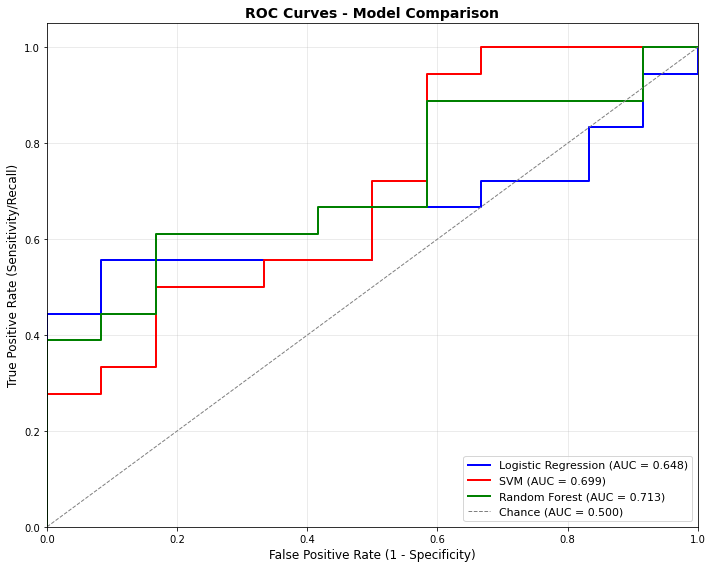

In [75]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

print(" GENERATING ROC CURVES")

plt.figure(figsize=(10, 8))

# Get predictions for each model
y_pred_proba_lr = model_lr_B.predict_proba(X_test_B)[:, 1]
y_pred_proba_svm = model_svm.predict_proba(X_test_B_scaled)[:, 1]
y_pred_proba_rf = model_rf.predict_proba(X_test_B)[:, 1]

# Calculate ROC curves
fpr_lr, tpr_lr, _ = roc_curve(y_test_B, y_pred_proba_lr)
fpr_svm, tpr_svm, _ = roc_curve(y_test_B, y_pred_proba_svm)
fpr_rf, tpr_rf, _ = roc_curve(y_test_B, y_pred_proba_rf)

roc_auc_lr = auc(fpr_lr, tpr_lr)
roc_auc_svm = auc(fpr_svm, tpr_svm)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot
plt.plot(fpr_lr, tpr_lr, color='blue', lw=2, label=f'Logistic Regression (AUC = {roc_auc_lr:.3f})')
plt.plot(fpr_svm, tpr_svm, color='red', lw=2, label=f'SVM (AUC = {roc_auc_svm:.3f})')
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.3f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--', label='Chance (AUC = 0.500)')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)', fontsize=12)
plt.ylabel('True Positive Rate (Sensitivity/Recall)', fontsize=12)
plt.title('ROC Curves - Model Comparison', fontsize=14, fontweight='bold')
plt.legend(loc="lower right", fontsize=11)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()



#### Step 11: Hyperparameter Tuning (GridSearchCV)

Optimize model parameters for better performance.

In [77]:
from sklearn.model_selection import GridSearchCV

print(" HYPERPARAMETER TUNING")


# Logistic Regression L1 - Tune C parameter
print("\n Tuning Logistic Regression (L1)")
param_grid_lr = {
    'C': [0.01, 0.1, 0.5, 1.0, 2.0, 5.0, 10.0]
}

grid_lr = GridSearchCV(
    LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000, random_state=42),
    param_grid_lr,
    cv=5,
    scoring='recall',  # Optimize for recall (most important)
    n_jobs=-1
)

grid_lr.fit(X_train_B, y_train_B)

print(f"   Best C: {grid_lr.best_params_['C']}")
print(f"   Best CV Recall: {grid_lr.best_score_:.4f}")

# Random Forest - Tune key parameters
print("\n Tuning Random Forest")
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10]
}

grid_rf = GridSearchCV(
    RandomForestClassifier(random_state=42, n_jobs=-1),
    param_grid_rf,
    cv=5,
    scoring='recall',
    n_jobs=-1
)

grid_rf.fit(X_train_B, y_train_B)

print(f"   Best n_estimators: {grid_rf.best_params_['n_estimators']}")
print(f"   Best max_depth: {grid_rf.best_params_['max_depth']}")
print(f"   Best min_samples_split: {grid_rf.best_params_['min_samples_split']}")
print(f"   Best CV Recall: {grid_rf.best_score_:.4f}")

print("\n Hyperparameter tuning complete")


 HYPERPARAMETER TUNING

 Tuning Logistic Regression (L1)
   Best C: 0.01
   Best CV Recall: 1.0000

 Tuning Random Forest
   Best n_estimators: 50
   Best max_depth: 5
   Best min_samples_split: 5
   Best CV Recall: 0.9306

 Hyperparameter tuning complete


#### Step 12: Evaluate Tuned Models

Test optimized models on test set.

 TUNED MODELS - FINAL EVALUATION
Tuned Logistic Regression (L1)

 Classification Metrics:
   Accuracy:   0.6000
   Precision:  0.6000 (Positive Predictive Value)
   Recall:     1.0000 (Sensitivity) 
   F1-Score:   0.7500
   ROC-AUC:    0.7014
   Specificity: 0.0000

 Confusion Matrix:
   True Negatives:    0 (Correctly predicted normal)
   False Positives:  12 (Incorrectly predicted elevated)
   False Negatives:   0 (Missed elevated cases)
   True Positives:   18 (Correctly predicted elevated)


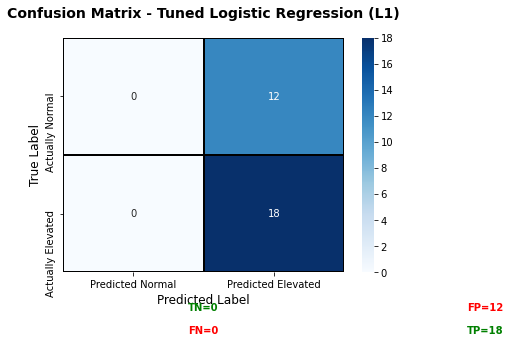

Tuned Random Forest

 Classification Metrics:
   Accuracy:   0.5667
   Precision:  0.6316 (Positive Predictive Value)
   Recall:     0.6667 (Sensitivity) 
   F1-Score:   0.6486
   ROC-AUC:    0.6620
   Specificity: 0.4167

 Confusion Matrix:
   True Negatives:    5 (Correctly predicted normal)
   False Positives:   7 (Incorrectly predicted elevated)
   False Negatives:   6 (Missed elevated cases)
   True Positives:   12 (Correctly predicted elevated)


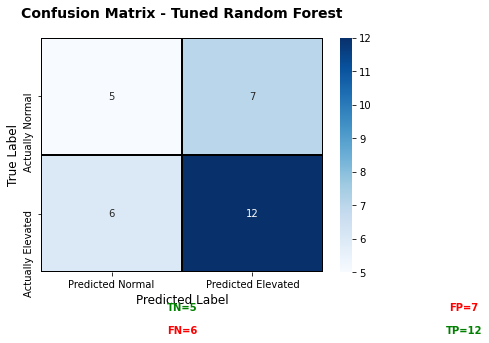

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


----------------------------------------------------------------------
BEFORE vs AFTER HYPERPARAMETER TUNING
             LR Original  LR Tuned  RF Original  RF Tuned
accuracy          0.5333    0.6000       0.6333    0.5667
precision         0.5833    0.6000       0.7059    0.6316
recall            0.7778    1.0000       0.6667    0.6667
f1                0.6667    0.7500       0.6857    0.6486
roc_auc           0.6481    0.7014       0.7130    0.6620
specificity       0.1667    0.0000       0.5833    0.4167

 Improvements:
   RECALL      : LR: +0.2222  |  RF: +0.0000
   F1          : LR: +0.0833  |  RF: -0.0371
   ROC_AUC     : LR: +0.0532  |  RF: -0.0509


In [78]:

print(" TUNED MODELS - FINAL EVALUATION")

# Evaluate tuned Logistic Regression
metrics_lr_tuned = evaluate_model(grid_lr.best_estimator_, X_test_B, y_test_B, 
                                   "Tuned Logistic Regression (L1)")

# Evaluate tuned Random Forest
metrics_rf_tuned = evaluate_model(grid_rf.best_estimator_, X_test_B, y_test_B, 
                                   "Tuned Random Forest")

# Compare before and after tuning
comparison_tuning = pd.DataFrame({
    'LR Original': pd.Series(metrics_lr_B),
    'LR Tuned': pd.Series(metrics_lr_tuned),
    'RF Original': pd.Series(metrics_rf),
    'RF Tuned': pd.Series(metrics_rf_tuned)
})

print("\n" + "-" * 70)
print("BEFORE vs AFTER HYPERPARAMETER TUNING")

print(comparison_tuning.round(4))

print("\n Improvements:")
for metric in ['recall', 'f1', 'roc_auc']:
    lr_improvement = metrics_lr_tuned[metric] - metrics_lr_B[metric]
    rf_improvement = metrics_rf_tuned[metric] - metrics_rf[metric]
    print(f"   {metric.upper():12s}: LR: {lr_improvement:+.4f}  |  RF: {rf_improvement:+.4f}")

